In [1]:
# We will need to introduce some terminology
# AHS
# AHS program
# Rydberg blockade

# Introduction of analog Hamiltonian simulation

Analog Hamiltonian simulation (AHS) is a different paradigm of quantum computing compared to the gate-based quantum computing. The idea of AHS is to use a well-controlled quantum system and engineer its interaction to mimic the dynamics of the interested Hamiltonian. 

In the gate-based quantum computation, a program is a quantum circuit consists of a series of quantum gates, each of which targets to only a subset of qubits. In contrast, an AHS program is one or a series of time-dependent Hamiltonians that govern the time evolution of all the qubits. The comparison can be seen below (Source: <a href="https://arxiv.org/pdf/2006.12326.pdf">Henriet et al.</a>)

![Comparison_AHS.png](Comparison_AHS.png)


Here we will focus on running AHS with Rydberg atoms. 

# Runnig AHS with Rydberg atoms

In order to run AHS program with Rydberg atoms, we will first have to understand what type of Hamiltonian can the Rydberg atoms simulate. 

## Introduction to Rydberg Hamiltonian

Depending on the atomic states we use for the Rydberg system, its Hamiltonian could take different forms. Here we shall focus on the following type of Hamiltonian
\begin{align}
H(t) = \sum_{k=1}^N H_{\text{drive}, k}(t) + \sum_{k=1}^N H_{\text{shift}, k}(t) + \sum_{j<k}V_{jk}\hat{n}_j\hat{n}_k. 
\end{align}
Here $H_{\text{drive}, k}(t)$ is the drive part of the Hamiltonian that addresses all the atoms simultaneously
\begin{align}
H_{\text{drive}, k}(t) = \frac{\Omega(t)}{2}\left(e^{i\phi(t)}|g_k\rangle\langle r_k| + e^{-i\phi(t)}|r_k\rangle\langle g_k|\right) - \Delta_\text{global}(t)\hat{n}_k,
\end{align}
where we $\Omega$, $\phi$, and $\Delta_\text{global}$ to denote the Rabi frequency, laser phase, and the detuning of the driving laser field on the atoms. $|g_k\rangle$, $r_k\rangle$ and $\hat{n}_k$ are used to denote the ground state, the Rydberg state and the number operator for the $k$-th atom respectively. The second term in $H(t)$ is the shift part of the Hamiltonian that detunes a subset of the atoms
\begin{align}
H_{\text{shift}, k}(t) = -\Delta_\text{local}(t)h_k\hat{n}_k,
\end{align}
where $\Delta_\text{local}(t)$ is the time-dependent magnitude of the frequency shift, and $h_k$ is the site-dependent coefficient, which is a dimensionless number between 0 and 1. Finally, the last term in $H(t)$ is the Van de Waals interaction between Rydberg atoms
\begin{align}
V_{jk} = \frac{C_6}{R_{jk}^6},
\end{align}
where $C_6$ is the interaction coefficient, and $R_{jk}=|{\bf r}_j-{\bf r}_k|$ is the distance between the two atoms. 

## Introduction to Rydberg blockade

For the interaction coefficient, the value of $C_6$ depends on the atom species, and the states used in the simulation. Here we shall take the value 
\begin{align}
C_6 = 5.42\times 10^{-24} \text{rad} m^6/s
\end{align}
for $|r\rangle = |70S_{1/2}\rangle$ of the $^{87}$Rb atoms. For the typical scenario, where atoms are separated by $4\times10^{-6}$ meters, the Van del Waals interaction reads $V_{jk}=1.32\times10^9 \text{rad}/s$ which is much larger than the typical scale of the Rabi frequency, which is around $6\times10^6 \text{rad}/s$. As a result, when the separation of two atoms is within certain distance, it is nearly impossible to drive them to the Rydberg state simultaneously. This is called the Rydberg blockade phenomena, and it is illustrated in the figure below. 

![Blockade.png](Blockade.png)

## Example: Rabi oscillation for two atoms in the blockade regime

As an example, we consider the time evolution of two atoms subject to the constant Rabi frequency. For simplicity, we assume the phase and the detuning are zero throughout the evolution, such that the Hamiltonian can be written as
\begin{align}
H(t) = \sum_{k=1}^2\frac{\Omega(t)}{2}\left(|g_k\rangle\langle r_k| + |r_k\rangle\langle g_k|\right) + V_{12}\hat{n}_1\hat{n}_2
\end{align}
where $k=1,2$ are the indices of the atoms. More concretely, in the basis of $\left\{|gg\rangle, |gr\rangle, |rg\rangle, |rr\rangle\right\}$, the Hamiltonian takes the following matrix representation
\begin{align}
H(t) = 
\begin{bmatrix}
0 & \frac{\Omega(t)}{2} & \frac{\Omega(t)}{2} & 0 \\
\frac{\Omega(t)}{2} & 0 & 0 & \frac{\Omega(t)}{2}\\
\frac{\Omega(t)}{2} & 0 & 0 & \frac{\Omega(t)}{2}\\
0 & \frac{\Omega(t)}{2} & \frac{\Omega(t)}{2} & V_{12}
\end{bmatrix}
\end{align}
In the case where $V_{12}\gg\Omega(t)$, the $|rr\rangle$ is very unlikely to be excited assuming the initial state is $|gg\rangle$. Hence we can neglect the $|rr\rangle$ state, and the Hamiltonian is simplified to be
\begin{align}
H(t) = 
\begin{bmatrix}
0 & \frac{\Omega(t)}{2} & \frac{\Omega(t)}{2} \\
\frac{\Omega(t)}{2} & 0 & 0 & \\
\frac{\Omega(t)}{2} & 0 & 0 & 
\end{bmatrix}
\end{align}
and the final state of the evolution can be solved to be
\begin{align}
|\psi\rangle = e^{iH(t)t}|gg\rangle = 
\begin{bmatrix}
\cos\frac{\Omega t}{\sqrt{2}}\\
\frac{i}{\sqrt{2}}\sin\frac{\Omega t}{\sqrt{2}}\\
\frac{i}{\sqrt{2}}\sin\frac{\Omega t}{\sqrt{2}}
\end{bmatrix}.
\end{align}
Hence we evolve the system for a duration $T=\frac{\pi}{\sqrt{2}\Omega}$, then we arrive at a maximally entangled state between the two atoms
\begin{align}
|\psi\rangle = \frac{1}{\sqrt{2}}(|g\rangle|r\rangle+|r\rangle|g\rangle)
\end{align}
We shall verify this in the next section. 

# Running an AHS program with local simulator

Here we illustrate how to run an AHS program on Braket using a local simulator. In particular, we would like to run the time evolution described above with two neutral atoms subject to the constant driving fields.

First, let us import the necessary packages and utility functions for this example


In [2]:
import numpy as np
# import matplotlib.pyplot as plt

from braket.ahs.atom_arrangement import AtomArrangement
from braket.ahs.time_series import TimeSeries
from braket.ahs.driving_field import DrivingField
from braket.ahs.analog_hamiltonian_simulation import AnalogHamiltonianSimulation

from utils import show_register, show_global_drive, show_final_avg_density

from braket.devices import LocalSimulator

In order to simulate the system, we will first need to specify the positions of the neutral atoms in a 2D `AtomArrangement`. Suppose the atoms are separated by a distance of $5.5\times10^{-6}$ meters, the atom arrangment can be specified and visualized as follows

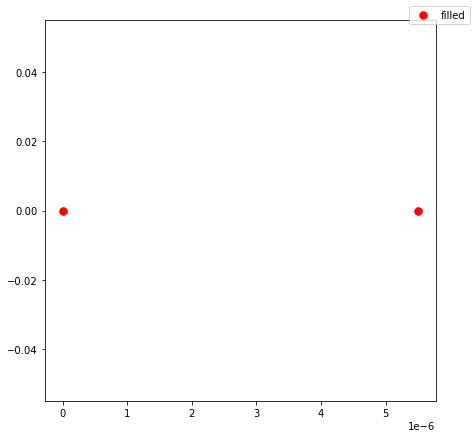

In [3]:
separation = 5.5e-6  # in meters 
register = AtomArrangement().add((0, 0)).add((separation, 0))
show_register(register)

As described in the previous section, we will subject the two atoms by a constant Rabi frequecy with the following magnitude

In [4]:
Omega = 2.5e6 # rad / s

As one can confirm, the Rabi frequency is much smaller than the interaction strength between the two atoms, which reads 
\begin{align}
V_{12}=\frac{C_6}{R_{12}^6} = \frac{5.42\times10^{-24}}{(5.5\times10^{-6})^6}\approx1.96\times10^8 \text{ rad/s}
\end{align}
Hence the two atoms are indeed in the Rydberg blockade regime as desired. In order to arrive at the maximally entangled state, we will specify the duration of the AHS program as

In [16]:
duration = np.pi/(np.sqrt(2)*Omega) # s

Next, we shall specify the Rabi frequency, which can be specified by two time-value pairs

In [17]:
time_points = [0, duration]
Omega = 2.5e6 # rad / s
amplitude_values = [Omega, Omega] 

amplitude = TimeSeries()
for t, v in zip(time_points, amplitude_values):
    amplitude.put(t, v)
    

We will also need to explicitly specify the phase $\phi(t)$ and detuning $\Delta(t)$, which are zero in this example.

In [18]:
detuning_values = [0, 0]
phase_values = [0, 0]

detuning = TimeSeries()
for t, v in zip(time_points, detuning_values):
    detuning.put(t, v)
    
phase = TimeSeries()
for t, v in zip(time_points, phase_values):
    phase.put(t, v)    

Next, we can assemble the $\Omega(t)$, $\phi(t)$ and $\Delta_\text{global}(t)$ into the driving field. 

In [19]:
drive = DrivingField(
    amplitude=amplitude, 
    detuning=detuning, 
    phase=phase
)

In order to confirm that we have specified the driving field correctly, it can be visualized as follows

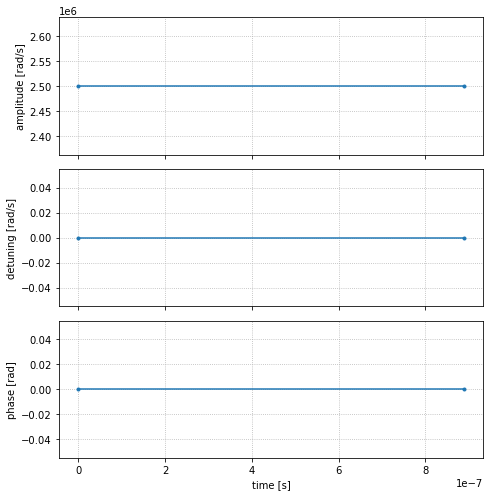

In [20]:
show_global_drive(drive)

Next, the AHS program is a collection of the register and the Hamiltonian, which contains only the driving field. 

In [21]:
ahs_program = AnalogHamiltonianSimulation(
    register=register, 
    hamiltonian=drive
)

The AHS program can be run on the neutral atom simulator to check the result

In [22]:
device = LocalSimulator("braket_ahs")
result = device.run(ahs_program, shots=100).result()

We can collect the measurement result as follows

In [24]:
post_sequences = [list(measurement.post_sequence) for measurement in result.measurements]

To confirm that we indeed arrive at a maximally entangled state, we count the number of occurence of $|gr\rangle$ and $|rg\rangle$ respectively

In [28]:
counters = {}
for post_sequence in post_sequences:
    if str(post_sequence) in counters:
        counters[str(post_sequence)] += 1
    else:
        counters[str(post_sequence)] = 1
counters

{'[1, 0]': 44, '[0, 1]': 56}

Indeed, this shows that the AHS program outputs a maximally entangled state for the two atoms, as desired. 

In summary, in this notebook, we have introduced the analog Hamiltonian simulation (AHS), a different quantum computing paradigm, and how to run AHS program with Rydberg atoms. We have also demonstrated how to run AHS program with the local simulator on Braket.